# **SUPPORT VECTOR MACHINE**

**A Support Vector Machine (SVM)** is a powerful and versatile Machine Learning
model, capable of performing linear or nonlinear **classification, regression, and even outlier detection**. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

**The advantages of support vector machines are:**


---

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- **Versatile:** different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**

---

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

The support vector machines in scikit-learn support both dense (**numpy.ndarray** and convertible to that by **numpy.asarray**) and sparse (any **scipy.sparse**) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered **numpy.ndarray** (dense) or **scipy.sparse.csr_matrix (sparse) with dtype=float64**.



![alt_text](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)
![alt_text](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)

![alt_text](https://miro.medium.com/v2/resize:fit:552/1*CD08yESKvYgyM7pJhCnQeQ.png)




To separate the two classes of data points, there are many possible **hyperplanes** that could be chosen. Our objective is to find a plane that has the **maximum margin**, i.e the maximum distance between data points of both classes. **Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.**

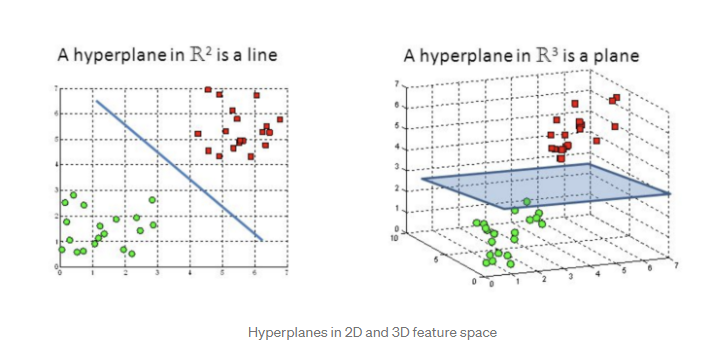

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

**Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.


## Types of SVM
SVM can be of two types:

**Linear SVM:** Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

**Non-linear SVM:** Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

## Hyperplane and Support Vectors in the SVM algorithm:
### Hyperplane:

There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.

The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features (as shown in image), then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane.

We always create a hyperplane that has a maximum margin, which means the maximum distance between the data points.

### Support Vectors:

The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.

# How does SVM works?
**Linear SVM:**

The working of the SVM algorithm can be understood by using an example. Suppose we have a dataset that has two tags (green and blue), and the dataset has two features x1 and x2. We want a classifier that can classify the pair(x1, x2) of coordinates in either green or blue. Consider the below image:

So as it is 2-d space so by just using a straight line, we can easily separate these two classes. But there can be multiple lines that can separate these classes. Consider the below image:


Hence, the SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the optimal hyperplane.


**Non-Linear SVM:**

If data is linearly arranged, then we can separate it by using a straight line, but for non-linear data, we cannot draw a single straight line. Consider the below image:


So to separate these data points, we need to add one more dimension. For linear data, we have used two dimensions x and y, so for non-linear data, we will add a third dimension z. It can be calculated as:
```
z=x^2 + y^2
```

In [351]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [352]:
data=pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [354]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [355]:
x=data.iloc[:,1:4]
y=data.iloc[:,4:]

In [356]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [357]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
# ct=ColumnTransformer(
#     [
#         ("Label Encoder",LabelEncoder(),[0])
#     ],
#     remainder="passthrough"
# )
# we cant use LabelEncoder() with column tranformer as it take 2D input and gives Numpy array as output whereas LE takes a series or 1D input
le=LabelEncoder()
x.iloc[:,0]=le.fit_transform(x.iloc[:,0])

In [358]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


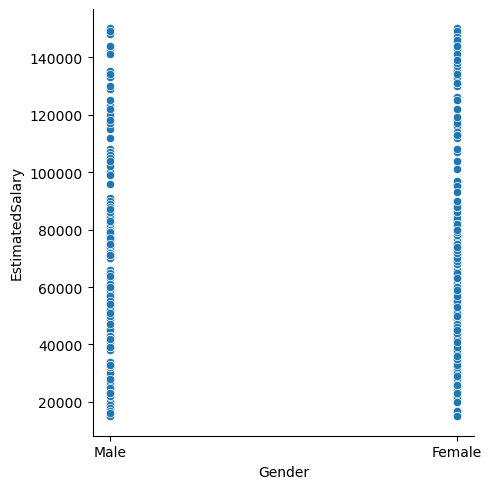

In [359]:
sns.relplot(data=data,x=data.Gender ,y=data.EstimatedSalary)

In [360]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="mean")
impute.fit(x)
x=impute.transform(x)

In [361]:
from sklearn.preprocessing import StandardScaler
ct=ColumnTransformer(
    [
        ("Standard Scaler",StandardScaler(),[1,2])
    ],
    remainder="passthrough"
)
x=ct.fit_transform(x)
x[:5]

array([[-1.78179743, -1.49004624,  1.        ],
       [-0.25358736, -1.46068138,  1.        ],
       [-1.11320552, -0.78528968,  0.        ],
       [-1.01769239, -0.37418169,  0.        ],
       [-1.78179743,  0.18375059,  1.        ]])

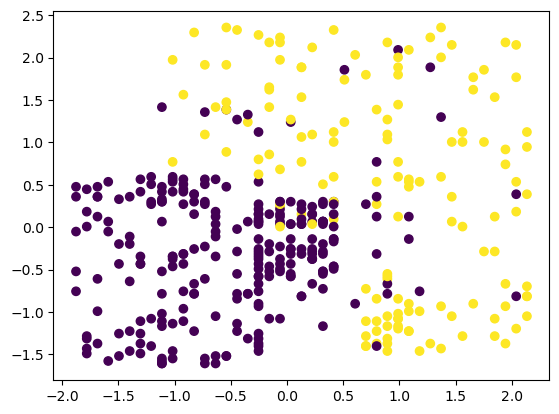

In [362]:
plt.scatter(x[:,0],x[:,1],c=y.values)

In [363]:
x[:,0].shape

(400,)

In [364]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [365]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.2,stratify=y)

In [366]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((320, 3), (320, 1), (80, 3), (80, 1))

In [367]:
y_train.value_counts(),y_test.value_counts()

(Purchased
 0            206
 1            114
 Name: count, dtype: int64,
 Purchased
 0            51
 1            29
 Name: count, dtype: int64)

In [368]:
from sklearn.svm import SVC
# radial basis function kernel

# C is the regularization parameter, it controls the 
# trade-off between smooth decision boundary and classifying training points correctly
#C parameter is inversly propotional to L2 regularization strength 
svc=SVC(kernel="rbf",C=100)
svc.fit(x_train,y_train)

c:\Users\S\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100)

Radial Basis Functions (RBF) are real-valued functions that use supervised machine learning (ML) to perform as a non-linear classifier. Its value depends on the distance between the input and a certain fixed point.  

`Radial Basis Kernel is a kernel function that is used in machine learning to find a non-linear classifier or regression line.`

## What is Kernel Function?

Kernel Function is used to transform n-dimensional input to m-dimensional input, where m is much higher than n then find the dot product in higher dimensional efficiently. The main idea to use kernel is: A linear classifier or regression curve in higher dimensions becomes a Non-linear classifier or regression curve in lower dimensions.

![alt text](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210722235324/c16fd6c515412f96a57506103896178d0e8af77d.png)

In [369]:
y_test.values.ravel()

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [370]:
y_pred=svc.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [371]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [372]:
cm

array([[45,  6],
       [ 4, 25]], dtype=int64)

In [373]:
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.81      0.86      0.83        29

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80



In [374]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

<Axes: >

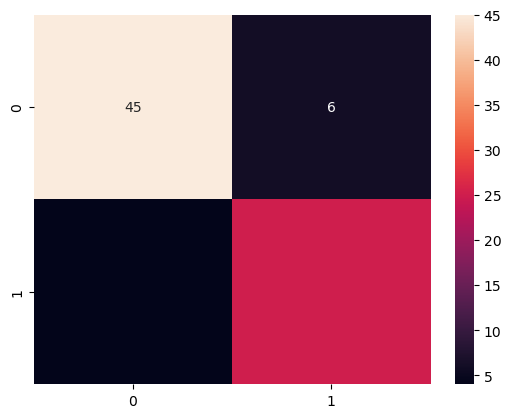

In [375]:
sns.heatmap(cm,annot=True)